<a href="https://colab.research.google.com/github/gabrielantonyxaviour/aptos-hack/blob/ML-model-to-predict-influencers-score-and-correlation-factor/ML_model_to_predict_influencers_score_and_correlation_factor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML MODEL

# Load Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Influencer data.csv to Influencer data (1).csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Influencer data (1).csv']))
df

,Follower Count,Likes,Comments,Ad Products Sold,Likes Frequency,Comments Frequency,Credibility Weight,Berries
0,6424388,109867,28373,3992,79,20,13707,51271
1,6551634,434061,30730,4823,11,23,24769,153020
2,4305572,541629,9982,3517,60,34,22699,174302
3,2235489,577363,33361,2268,55,10,11384,193312
4,9959614,154326,45497,9836,69,27,25594,76737
...,...,...,...,...,...,...,...,...
4995,6990875,475585,11177,9791,76,21,7229,150445
4996,9892669,950053,35102,9236,94,8,17085,307704
4997,8902674,91779,42417,5319,56,15,24593,56130
4998,4009146,681165,13348,1867,19,25,17763,216360


# Data preperation

## Data seperation as X and Y

In [ ]:
y = df['Berries']
y

,Berries
0,51271
1,153020
2,174302
3,193312
4,76737
...,...
4995,150445
4996,307704
4997,56130
4998,216360


In [ ]:
x = df.drop('Berries',axis=1)
x

,Follower Count,Likes,Comments,Ad Products Sold,Likes Frequency,Comments Frequency,Credibility Weight
0,6424388,109867,28373,3992,79,20,13707
1,6551634,434061,30730,4823,11,23,24769
2,4305572,541629,9982,3517,60,34,22699
3,2235489,577363,33361,2268,55,10,11384
4,9959614,154326,45497,9836,69,27,25594
...,...,...,...,...,...,...,...
4995,6990875,475585,11177,9791,76,21,7229
4996,9892669,950053,35102,9236,94,8,17085
4997,8902674,91779,42417,5319,56,15,24593
4998,4009146,681165,13348,1867,19,25,17763


## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [ ]:
x_train

,Follower Count,Likes,Comments,Ad Products Sold,Likes Frequency,Comments Frequency,Credibility Weight
4833,1418231,924453,39720,3794,43,23,22127
1218,8370689,384196,11302,1462,56,23,16560
135,6707971,480851,9501,705,97,3,29466
3612,6790408,117469,46549,1199,24,18,29432
3259,6501785,955525,5618,5972,35,25,26693
...,...,...,...,...,...,...,...
4149,9856780,828904,46563,1299,2,41,25310
1890,8890782,874902,49955,8637,4,1,1540
350,3376957,476252,22681,623,38,39,22838
79,5518209,630074,47793,3111,25,4,9153


from matplotlib import pyplot as plt
x_train['Follower Count'].plot(kind='hist', bins=20, title='Follower Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train['Likes'].plot(kind='hist', bins=20, title='Likes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train['Comments'].plot(kind='hist', bins=20, title='Comments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train['Ad Products Sold'].plot(kind='hist', bins=20, title='Ad Products Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train.plot(kind='scatter', x='Follower Count', y='Likes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train.plot(kind='scatter', x='Likes', y='Comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train.plot(kind='scatter', x='Comments', y='Ad Products Sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train.plot(kind='scatter', x='Ad Products Sold', y='Likes Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x_train['Follower Count'].plot(kind='line', figsize=(8, 4), title='Follower Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x_train['Likes'].plot(kind='line', figsize=(8, 4), title='Likes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x_train['Comments'].plot(kind='line', figsize=(8, 4), title='Comments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x_train['Ad Products Sold'].plot(kind='line', figsize=(8, 4), title='Ad Products Sold')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
x_test

,Follower Count,Likes,Comments,Ad Products Sold,Likes Frequency,Comments Frequency,Credibility Weight
789,9302434,945954,42866,6680,22,30,17914
2507,4464158,784852,45795,4887,93,34,16905
2376,3416871,627863,35063,215,52,16,9200
1378,4181303,153806,38654,9834,98,12,22371
598,1345027,444944,374,1097,35,3,21663
...,...,...,...,...,...,...,...
1451,5069002,215805,37011,2023,36,33,25964
4921,54687,225925,18271,4790,91,19,4734
3091,8067513,408648,21234,6330,93,37,27598
3683,880459,568278,11812,698,72,29,18178


# **Model building**

## **Linear Regression**

### Traning model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Apply model to make prediction

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([303843.16343331, 125888.28728826, 157856.19505536, ...,
       161079.35562833, 215668.19313899, 265767.21783153])

In [ ]:
y_lr_test_pred

array([310601.87508454, 263440.97713631, 208659.08882198,  72192.57632825,
       140173.47452289, 143272.17748963, 268796.78359716, 245796.06665558,
       299316.80154375, 115651.64681171,  57921.38289877,  41501.86773739,
       214229.08536223, 128209.70319226, 156633.50892237,  54656.98543895,
       132459.17256271, 253447.56969053, 133835.17576277, 189288.39273977,
       231846.65802083, 247061.21917415, 229245.06902963, 169545.089093  ,
       239750.28581657, 252826.95790578, 289431.96431362, 270753.99247863,
        25557.67322103, 198005.5879532 , 165422.98847647, 202317.59127039,
       278949.68911238, 126117.49669088, 166085.8611432 , 197066.66463356,
       116222.79920012, 206710.5819651 , 152400.94690168, 121746.69060985,
       214545.08403914, 143438.98063533, 251998.37548822,  96084.5684079 ,
       276433.36339387,  28859.87746223, 109357.58554933,  95666.27737631,
        93779.68161493, 150063.87897141,  61630.57327208, 244722.85892857,
        65508.66969166, 2

###Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print("Linear Regression Model Performance:")
print("Training MSE:", lr_train_mse)
print("Training R2:", lr_train_r2)
print("Test MSE:", lr_test_mse)
print("Test R2:", lr_test_r2)

Linear Regression Model Performance:
Training MSE: 0.16434894138195585
Training R2: 0.9999999999779872
Test MSE: 0.15905592948102998
Test R2: 0.999999999979525


In [ ]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Testing MSE','Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Testing MSE,Test R2
0,Linear regression,0.164349,1.0,0.159056,1.0


## Random Forest

## Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make a prediction

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluating Model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,448059264.718379,0.939987,483770224.504968,0.937725


## Model Comparison

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Test R2,Test MSE
0,Linear regression,0.164349,1.0,0.159056,1.0,NaN
1,Random forest,448059264.718379,0.939987,NaN,0.937725,483770224.504968


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Testing MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_4.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_5.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

<string>:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Testing MSE'].value_counts()
    for x_label, grp in _df_6.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Testing MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_7.groupby('Testing MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Testing MSE')
_ = plt.ylabel('Test R2')

In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Testing MSE,Test R2,Test MSE
0,Linear regression,0.164349,1.0,0.159056,1.0,NaN
1,Random forest,448059264.718379,0.939987,NaN,0.937725,483770224.504968


from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('Method').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('Training MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('Training R2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('Testing MSE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training MSE'].value_counts()
    for x_label, grp in _df_12.groupby('Method')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Method')
_ = plt.ylabel('Training MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Training R2'].value_counts()
    for x_label, grp in _df_13.groupby('Training MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training MSE')
_ = plt.ylabel('Training R2')

<string>:5: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Testing MSE'].value_counts()
    for x_label, grp in _df_14.groupby('Training R2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Training R2')
_ = plt.ylabel('Testing MSE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Test R2'].value_counts()
    for x_label, grp in _df_15.groupby('Testing MSE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Testing MSE')
_ = plt.ylabel('Test R2')

# Data visualization of predicted result

Text(0.5, 0, 'Experimental Score')

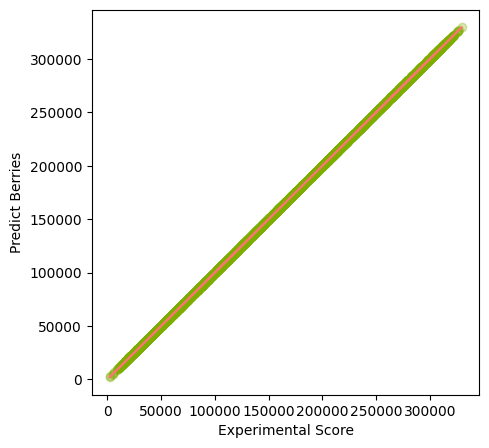

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predict Berries')
plt.xlabel('Experimental Score')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame containing the data

# Separate features (x) and target (y)
y = df['Berries']
x = df.drop('Berries', axis=1)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# To predict the 'Influencer Score' for new data, use:
# new_data_predictions = model.predict(new_data)

Mean Squared Error: 0.15905592948102998
R-squared: 0.999999999979525


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of 'Influencer Score' with other parameters
influencer_score_corr = correlation_matrix['Berries']

# Print the correlations
print(influencer_score_corr)

# You can also sort the correlations in descending order:
sorted_corr = influencer_score_corr.sort_values(ascending=False)
print(sorted_corr)

Follower Count       -0.025110
Likes                 0.996130
Comments              0.100668
Ad Products Sold     -0.015121
Likes Frequency       0.003711
Comments Frequency   -0.008720
Credibility Weight    0.037270
Berries               1.000000
Name: Berries, dtype: float64
Berries               1.000000
Likes                 0.996130
Comments              0.100668
Credibility Weight    0.037270
Likes Frequency       0.003711
Comments Frequency   -0.008720
Ad Products Sold     -0.015121
Follower Count       -0.025110
Name: Berries, dtype: float64


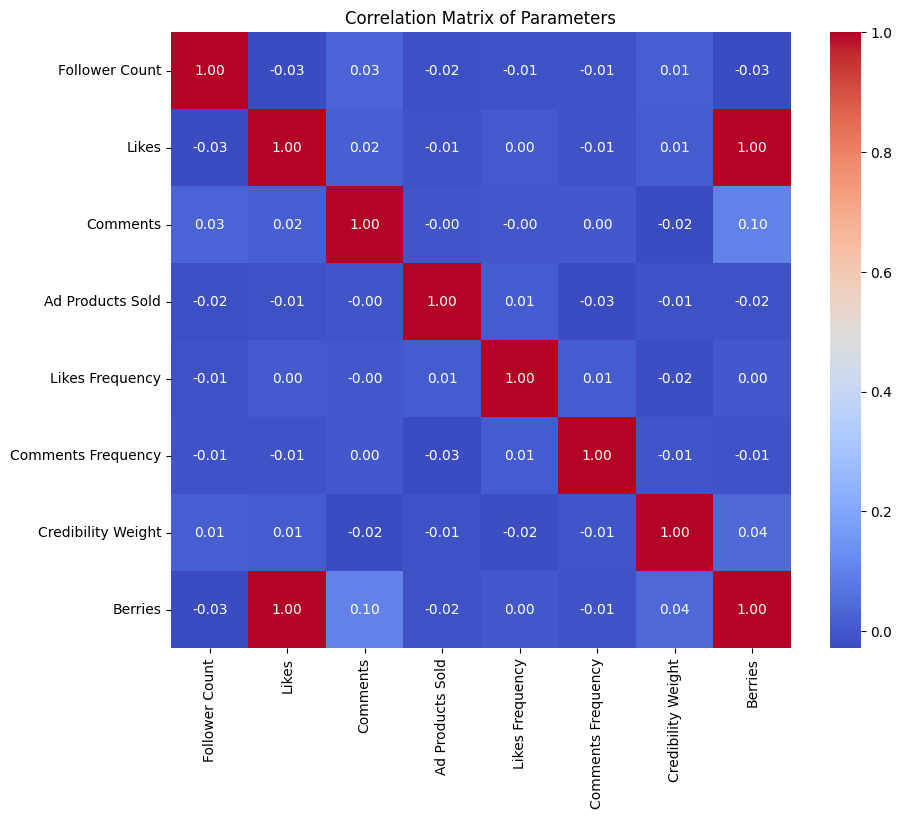

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Parameters")
plt.show()

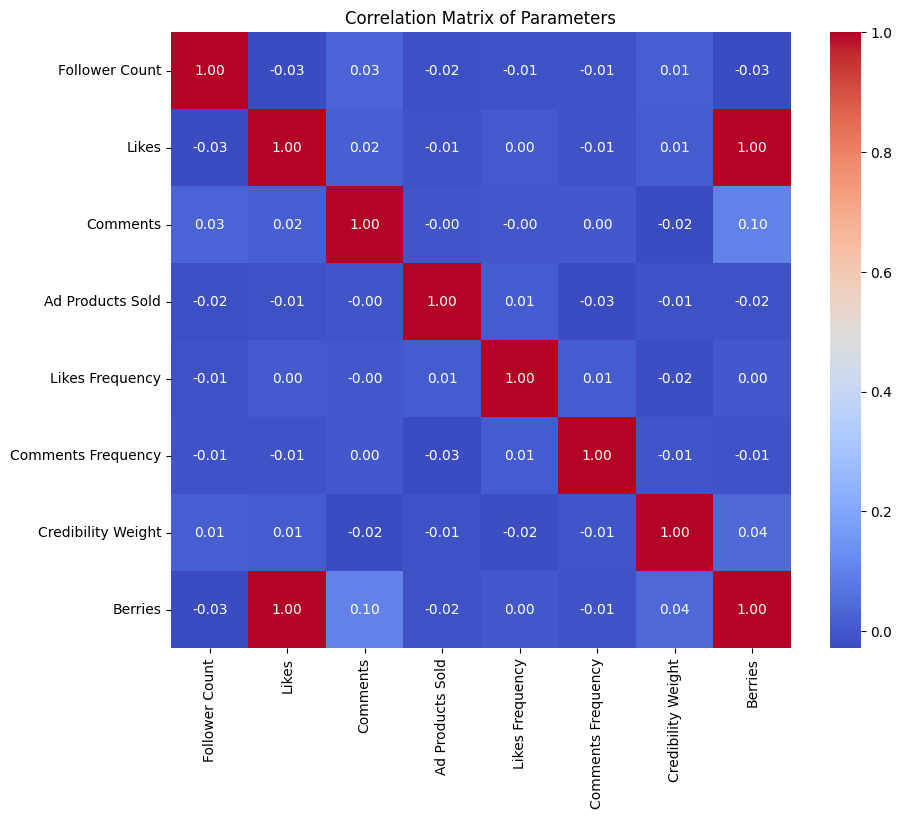

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Parameters")
plt.show()

In [ ]:

# Assuming 'model' is your trained Linear Regression model (from previous code)

# Get the coefficients and intercept from the trained model
coefficients = model.coef_
intercept = model.intercept_

# Function to calculate 'Berries'
def calculate_berries(Follower_Count, Likes, Comments, Ad_Products_Sold, Likes_Frequency, Comments_Frequency, Credibility_Weight):
    # Calculate 'Berries' using the formula
    berries = intercept + coefficients[0] * Follower_Count + coefficients[1] * Likes + coefficients[2] * Comments + coefficients[3] * Ad_Products_Sold + coefficients[4] * Likes_Frequency + coefficients[5] * Comments_Frequency + coefficients[6] * Credibility_Weight

    return berries

# Get input values from the user
Follower_Count = float(input("Enter Follower Count: "))
Likes = float(input("Enter Likes: "))
Comments = float(input("Enter Comments: "))
Ad_Products_Sold = float(input("Enter Ad Products Sold: "))
Likes_Frequency = float(input("Enter Likes Frequency: "))
Comments_Frequency = float(input("Enter Comments Frequency: "))
Credibility_Weight = float(input("Enter Credibility Weight: "))

# Calculate 'Berries'
calculated_berries = calculate_berries(Follower_Count, Likes, Comments, Ad_Products_Sold, Likes_Frequency, Comments_Frequency, Credibility_Weight)

# Print the calculated value
print("Calculated Berries:", calculated_berries)

Enter Follower Count: 345528
Enter Likes: 45433
Enter Comments: 5432
Enter Ad Products Sold: 5632
Enter Likes Frequency: 100
Enter Comments Frequency: 89
Enter Credibility Weight: 3211
Calculated Berries: 17337.2369915898


In [ ]:
# ... (previous code) ...

# Calculate 'Berries'
calculated_berries = calculate_berries(Follower_Count, Likes, Comments, Ad_Products_Sold, Likes_Frequency, Comments_Frequency, Credibility_Weight)

# Round off the calculated value to 2 decimal places
rounded_berries = round(calculated_berries, 2)

# Print the rounded value
print("Rounded Berries:", rounded_berries)

Rounded Berries: 17337.24


In [ ]:
import pickle

# Assuming 'model' is your trained Linear Regression model

# Save the model to a file named 'linear_regression_model.pkl'
filename = 'linear_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import pickle

# Load the model from the file
filename = 'linear_regression_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

# Now you can use 'loaded_model' for making predictions

In [ ]:
from google.colab import files

# Assuming you have saved the model to 'linear_regression_model.pkl'

files.download('linear_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>